<a href="https://colab.research.google.com/github/kathisw/hemophilia/blob/main/Hemophilia_Logistic_Regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Haemophilia data - EXPLORATORY DATA ANALYSIS

In [23]:
import pandas as pd
import numpy as np
from google.colab import files


uploaded = files.upload()

df = pd.read_excel(list(uploaded.keys())[0], sheet_name="CHBMP Variant List")

print("Dataset Shape:", df.shape)
print("Columns in Dataset:", df.columns)
df.head()

Saving CHBMP-Variant-List-2022 (3).xlsx to CHBMP-Variant-List-2022 (3) (1).xlsx
Dataset Shape: (1399, 21)
Columns in Dataset: Index(['HGVS cDNA Name', 'Yoshitake Nucleotide No.', 'hg19 Nucleotide No.',
       'HGVS Protein Name', 'Mature Protein Change', 'Variant Type',
       'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype', 'Severe\n(<1U/dL)',
       'Moderate\n(1-5U/dL)', 'Mild\n(>5U/dL)', 'No FIX level given',
       'Reported\nSeverity', 'History of Inhibitor', 'Comments', 'Year',
       'Reference Number', 'Newly Added in the Current Version '],
      dtype='object')


,HGVS cDNA Name,Yoshitake Nucleotide No.,hg19 Nucleotide No.,HGVS Protein Name,Mature Protein Change,Variant Type,Mechanism,Exon,Codon,Domain,...,Severe\n(<1U/dL),Moderate\n(1-5U/dL),Mild\n(>5U/dL),No FIX level given,Reported\nSeverity,History of Inhibitor,Comments,Year,Reference Number,Newly Added in the Current Version
0,c.-29-?_391+?;521-?_1386+?del,1-?_10505+?;20363-?_31369+?del,g.138612895-?_138623348+?del;g.138633221-?_138...,NaN,del Exon 1-4; 6-8,Large Structure Change (>50bp),Deletion,"1-4, 6-8",NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2001,121,NaN
1,c.-29-?_88+?del,1-?_117+?del,g.138612895-?_138613011+?del,NaN,del Exon 1,Large Structure Change (>50bp),Deletion,1,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Not Reported,FIX Yemen,1989,28,NaN
2,c.-29-?_520+?del,1-?_17797+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-5,Large Structure Change (>50bp),Deletion,1-5,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2012,144,NaN
3,c.-29-?_723+?del,1-?_20565+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-6,Large Structure Change (>50bp),Deletion,1-6,NaN,NaN,...,X,NaN,NaN,NaN,Severe,No,NaN,2001,121,NaN
4,c.-29-?_723+?dup,1-?_20565+?dup,g.138612895-?_138630650+?dup,NaN,dup Exon 1-6,Large Structure Change (>50bp),Duplication,1-6,NaN,NaN,...,NaN,NaN,NaN,X,Not Reported,Not Reported,NaN,2019,185,X


In [24]:
# Define the function to classify severity from raw columns
def classify_severity(row):
    if "Severe" in str(row).strip():
        return "Severe"
    elif "Moderate" in str(row).strip():
        return "Moderate"
    elif "Mild" in str(row).strip():
        return "Mild"
    else:
        return "Not Reported"

In [25]:
df["Severity"] = df.apply(classify_severity, axis=1) # Change df_chbmp to df


In [26]:
print("Unique values in Severity Column:\n", df["Severe\n(<1U/dL)"].unique())


print("\nMissing values in Severity Column:", df["Severe\n(<1U/dL)"].isnull().sum())


df["Severity"] = df["Severe\n(<1U/dL)"].apply(lambda x: "Severe" if x == "X" else "Non-Severe")

print("\nCleaned Severity Column Sample:")
print(df[["Severe\n(<1U/dL)", "Severity"]].head())


print("\nSeverity Distribution:")
print(df["Severity"].value_counts())


Unique values in Severity Column:
 ['X' nan]

Missing values in Severity Column: 731

Cleaned Severity Column Sample:
  Severe\n(<1U/dL)    Severity
0                X      Severe
1                X      Severe
2                X      Severe
3                X      Severe
4              NaN  Non-Severe

Severity Distribution:
Severity
Non-Severe    731
Severe        668
Name: count, dtype: int64


In [27]:
print("Unique values in Inhibitor History Column:\n", df["History of Inhibitor"].unique())


print("\nMissing values in Inhibitor History Column:", df["History of Inhibitor"].isnull().sum())


df = df.dropna(subset=["History of Inhibitor"])


print("\nInhibitor Presence Distribution:")
print(df["History of Inhibitor"].value_counts())


df["Inhibitor_History"] = df["History of Inhibitor"].apply(lambda x:
                                                            "Yes" if x.strip().lower() == "yes" else
                                                            "No" if x.strip().lower() == "no" else
                                                            "Not Reported")

Unique values in Inhibitor History Column:
 ['Yes' 'Not Reported' 'No' 'Np' 'Not reported' 'No ']

Missing values in Inhibitor History Column: 0

Inhibitor Presence Distribution:
History of Inhibitor
Not Reported    1044
No               310
Yes               40
Not reported       3
Np                 1
No                 1
Name: count, dtype: int64


<ipython-input-28-ef0b98fe430e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Inhibitor_History", palette="Oranges")


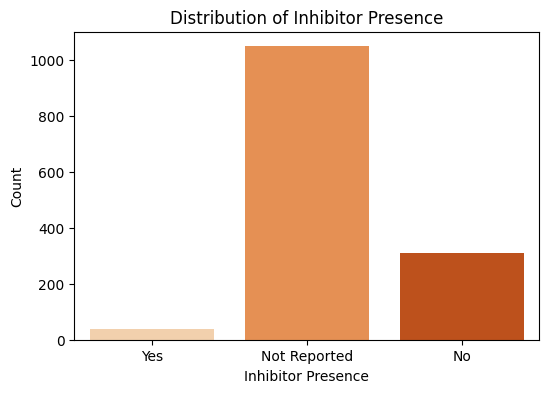


Missing values in Inhibitor-related columns:
Inhibitor_History    0
dtype: int64

Proportion of Inhibitor Cases (%):
Inhibitor_History
Not Reported    74.910650
No              22.230164
Yes              2.859185
Name: proportion, dtype: float64


In [28]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Inhibitor_History", palette="Oranges")
plt.title("Distribution of Inhibitor Presence")
plt.xlabel("Inhibitor Presence")
plt.ylabel("Count")
plt.show()


print("\nMissing values in Inhibitor-related columns:")
print(df[["Inhibitor_History"]].isnull().sum())


inhibitor_counts = df["Inhibitor_History"].value_counts(normalize=True) * 100
print("\nProportion of Inhibitor Cases (%):")
print(inhibitor_counts)

In [29]:
import pandas as pd
from google.colab import files


uploaded = files.upload()


chbmp_file_path = list(uploaded.keys())[0]


xls_chbmp = pd.ExcelFile(chbmp_file_path)
print("Available sheets in CHBMP dataset:", xls_chbmp.sheet_names)


df_chbmp = pd.read_excel(xls_chbmp, sheet_name="CHBMP Variant List")


df_chbmp.head()

Saving CHBMP-Variant-List-2022 (3).xlsx to CHBMP-Variant-List-2022 (3) (2).xlsx
Available sheets in CHBMP dataset: ['Table of Contents', 'CHBMP Variant List', 'Field Definitions', 'References', 'Figures', 'Tables', 'Database Methods', 'Exclusions', 'Instructions', 'Submission Form']


,HGVS cDNA Name,Yoshitake Nucleotide No.,hg19 Nucleotide No.,HGVS Protein Name,Mature Protein Change,Variant Type,Mechanism,Exon,Codon,Domain,...,Severe\n(<1U/dL),Moderate\n(1-5U/dL),Mild\n(>5U/dL),No FIX level given,Reported\nSeverity,History of Inhibitor,Comments,Year,Reference Number,Newly Added in the Current Version
0,c.-29-?_391+?;521-?_1386+?del,1-?_10505+?;20363-?_31369+?del,g.138612895-?_138623348+?del;g.138633221-?_138...,NaN,del Exon 1-4; 6-8,Large Structure Change (>50bp),Deletion,"1-4, 6-8",NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2001,121,NaN
1,c.-29-?_88+?del,1-?_117+?del,g.138612895-?_138613011+?del,NaN,del Exon 1,Large Structure Change (>50bp),Deletion,1,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Not Reported,FIX Yemen,1989,28,NaN
2,c.-29-?_520+?del,1-?_17797+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-5,Large Structure Change (>50bp),Deletion,1-5,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2012,144,NaN
3,c.-29-?_723+?del,1-?_20565+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-6,Large Structure Change (>50bp),Deletion,1-6,NaN,NaN,...,X,NaN,NaN,NaN,Severe,No,NaN,2001,121,NaN
4,c.-29-?_723+?dup,1-?_20565+?dup,g.138612895-?_138630650+?dup,NaN,dup Exon 1-6,Large Structure Change (>50bp),Duplication,1-6,NaN,NaN,...,NaN,NaN,NaN,X,Not Reported,Not Reported,NaN,2019,185,X


In [30]:
print("Columns in CHBMP dataset:\n", df_chbmp.columns)


severity_columns = ["Severe\n(<1U/dL)", "Moderate\n(1-5U/dL)", "Mild\n(>5U/dL)"]  # Removed extra spaces and adjusted newline characters

for col in severity_columns:
    print(f"\nUnique values in {col}:")
    print(df_chbmp[col].unique())


print("\nMissing Values in Severity Columns:")
print(df_chbmp[severity_columns].isnull().sum())

Columns in CHBMP dataset:
 Index(['HGVS cDNA Name', 'Yoshitake Nucleotide No.', 'hg19 Nucleotide No.',
       'HGVS Protein Name', 'Mature Protein Change', 'Variant Type',
       'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype', 'Severe\n(<1U/dL)',
       'Moderate\n(1-5U/dL)', 'Mild\n(>5U/dL)', 'No FIX level given',
       'Reported\nSeverity', 'History of Inhibitor', 'Comments', 'Year',
       'Reference Number', 'Newly Added in the Current Version '],
      dtype='object')

Unique values in Severe
(<1U/dL):
['X' nan]

Unique values in Moderate
(1-5U/dL):
[nan 'X']

Unique values in Mild
(>5U/dL):
[nan 'X']

Missing Values in Severity Columns:
Severe\n(<1U/dL)        731
Moderate\n(1-5U/dL)    1130
Mild\n(>5U/dL)         1207
dtype: int64


In [31]:
def classify_severity(row):
    # Updated column names to match the actual column names in the DataFrame
    if row["Severe\n(<1U/dL)"] == "X":
        return "Severe"
    elif row["Moderate\n(1-5U/dL)"] == "X":
        return "Moderate"
    elif row["Mild\n(>5U/dL)"] == "X":
        return "Mild"
    else:
        return "Not Reported"

df_chbmp["Severity"] = df_chbmp.apply(classify_severity, axis=1)

print("\nFinal Severity Distribution:")
print(df_chbmp["Severity"].value_counts())


Final Severity Distribution:
Severity
Severe          668
Not Reported    305
Moderate        249
Mild            177
Name: count, dtype: int64


<ipython-input-32-877789267f34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_chbmp, x="Severity", palette="Blues")


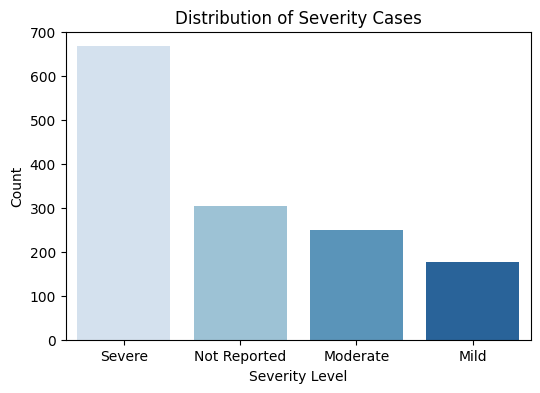

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.countplot(data=df_chbmp, x="Severity", palette="Blues")
plt.title("Distribution of Severity Cases")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

In [33]:
print("\nUnique Variant Types:")
print(df_chbmp["Variant Type"].unique())


variant_counts = df_chbmp["Variant Type"].value_counts()
print("\nVariant Type Distribution:")
print(variant_counts)


Unique Variant Types:
['Large Structure Change (>50bp)' 'Missense' 'Splice site change'
 'Frameshift' 'Nonsense' 'Small structural change (in-frame, <50bp)'
 'Synonymous' 'large Structure Change (>50bp)' 'Promoter' 'frameshift'
 "3'UTR"]

Variant Type Distribution:
Variant Type
Missense                                     755
Frameshift                                   228
Nonsense                                     124
Splice site change                           122
Large Structure Change (>50bp)                48
Small structural change (in-frame, <50bp)     36
Promoter                                      36
3'UTR                                         17
frameshift                                    16
Synonymous                                    15
large Structure Change (>50bp)                 2
Name: count, dtype: int64


<ipython-input-34-575dc53d73b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_chbmp, y="Variant Type", order=df_chbmp["Variant Type"].value_counts().index, palette="coolwarm")


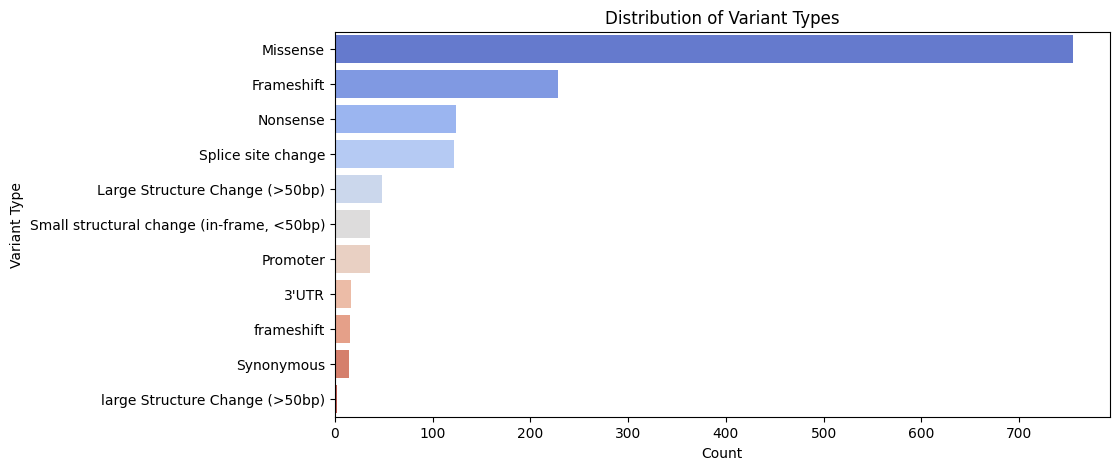

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.countplot(data=df_chbmp, y="Variant Type", order=df_chbmp["Variant Type"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Variant Types")
plt.xlabel("Count")
plt.ylabel("Variant Type")
plt.show()

<Figure size 1200x600 with 0 Axes>

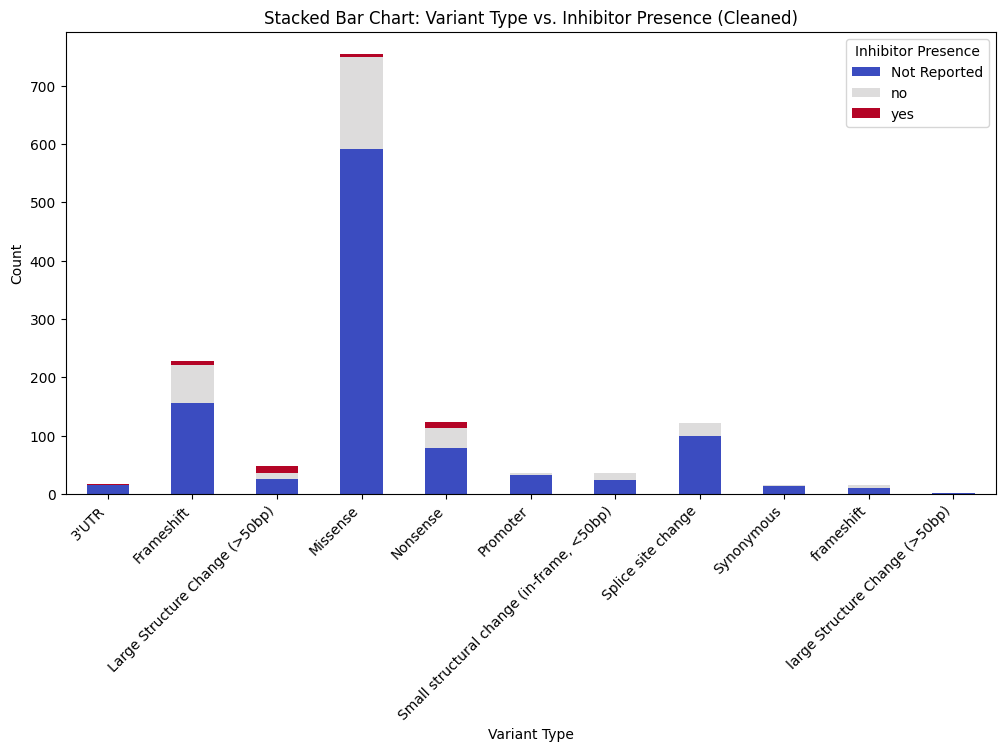

In [35]:
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].str.strip().str.lower()


df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "no ": "No",
    "not reported": "Not Reported",
    "np": "Not Reported",
    "yes ": "Yes"
})


plt.figure(figsize=(12,6))
variant_inhibitor_counts = df_chbmp.groupby("Variant Type")["History of Inhibitor"].value_counts().unstack()
variant_inhibitor_counts.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")

plt.title("Stacked Bar Chart: Variant Type vs. Inhibitor Presence (Cleaned)")
plt.xlabel("Variant Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Inhibitor Presence")
plt.show()


In [36]:
import pandas as pd
from google.colab import files


uploaded = files.upload()
chbmp_file_path = list(uploaded.keys())[0]
df_chbmp = pd.read_excel(chbmp_file_path, sheet_name="CHBMP Variant List")


def classify_severity(row):
    if row["Severe\n(<1U/dL)"] == "X":
        return "Severe"
    elif row["Moderate\n(1-5U/dL)"] == "X":
        return "Moderate"
    elif row["Mild\n(>5U/dL)"] == "X":
        return "Mild"
    else:
        return "Not Reported"

df_chbmp["Severity"] = df_chbmp.apply(classify_severity, axis=1)


severity_inhibitor_percent = pd.crosstab(df_chbmp["Severity"], df_chbmp["History of Inhibitor"], normalize='index') * 100


print("Percentage Distribution of Inhibitor Presence per Severity:")
print(severity_inhibitor_percent.round(2))

Saving CHBMP-Variant-List-2022 (3).xlsx to CHBMP-Variant-List-2022 (3) (3).xlsx
Percentage Distribution of Inhibitor Presence per Severity:
History of Inhibitor     No   No   Not Reported  Not reported   Np   Yes
Severity                                                                
Mild                  20.34  0.00         78.53          1.13  0.0  0.00
Moderate              20.88  0.00         77.91          0.00  0.4  0.80
Not Reported          11.80  0.00         85.90          0.00  0.0  2.30
Severe                27.84  0.15         67.22          0.15  0.0  4.64


Percentage Distribution of Inhibitor Presence per Severity:

In [38]:
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].str.strip().str.title()


df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "Np": "Not Reported",
    "No ": "No",
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes"
})

This will collapse all similar entries into one label, cleaning the next charts or model inputs.

duplicate “No”, “Not Reported”, and “Yes” labels due to inconsistent casing or spacing in the History of Inhibitor column.

In [39]:
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].astype(str).str.strip().str.lower().str.title()

df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "Np": "Not Reported",
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes",
    "No ": "No",
    "No": "No",
    "Yes": "Yes"
})


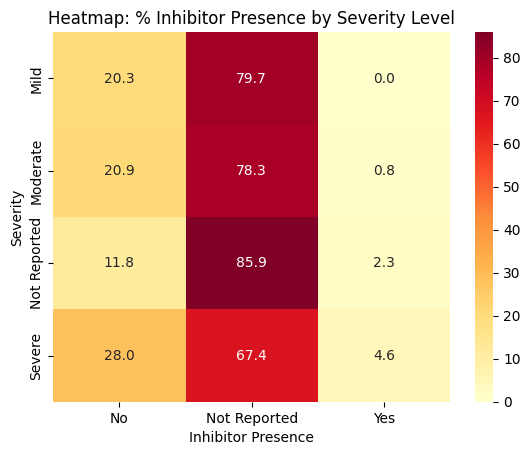

In [40]:
severity_inhibitor_percent = pd.crosstab(
    df_chbmp["Severity"],
    df_chbmp["History of Inhibitor"],
    normalize='index'
) * 100

sns.heatmap(severity_inhibitor_percent, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Severity Level")
plt.ylabel("Severity")
plt.xlabel("Inhibitor Presence")
plt.show()


This visually supports the published research uploaded, which says:

“Inhibitors are more common in severe hemophilia than moderate/mild.”

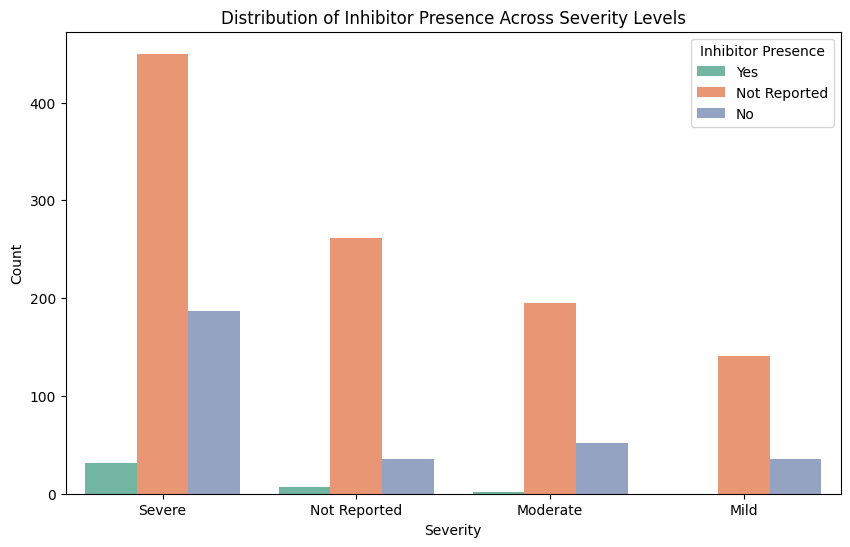

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_chbmp, x="Severity", hue="History of Inhibitor", palette="Set2")
plt.title("Distribution of Inhibitor Presence Across Severity Levels")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Inhibitor Presence")
plt.show()


we can clearly say:

Severe patients have the highest “Yes” (green) counts for inhibitor presence.

Moderate & Mild rarely report inhibitors.

Most records still fall under “Not Reported”,

Severe cases have the highest rate of inhibitor positivity (4.6%)

Moderate and mild patients rarely show inhibitor development

Most missing values still fall under "Not Reported", especially in moderate/mild groups

Frequency distribution of Inhibitor Presence across Variant Types

In [42]:

variant_inhibitor_ct = pd.crosstab(df_chbmp["Variant Type"], df_chbmp["History of Inhibitor"])
print("Variant Type vs Inhibitor Presence:")
print(variant_inhibitor_ct)

Variant Type vs Inhibitor Presence:
History of Inhibitor                        No  Not Reported  Yes
Variant Type                                                     
3'UTR                                        0            16    1
Frameshift                                  65           156    7
Large Structure Change (>50bp)              10            25   13
Missense                                   157           592    6
Nonsense                                    35            78   11
Promoter                                     3            33    0
Small structural change (in-frame, <50bp)   12            23    1
Splice site change                          21           100    1
Synonymous                                   1            14    0
frameshift                                   6            10    0
large Structure Change (>50bp)               1             1    0


“Large Structure Change” has the strongest signal: ~27% have inhibitors

“Nonsense” also shows elevated risk

“Missense” and “Synonymous” are low risk, which aligns with the medical literature

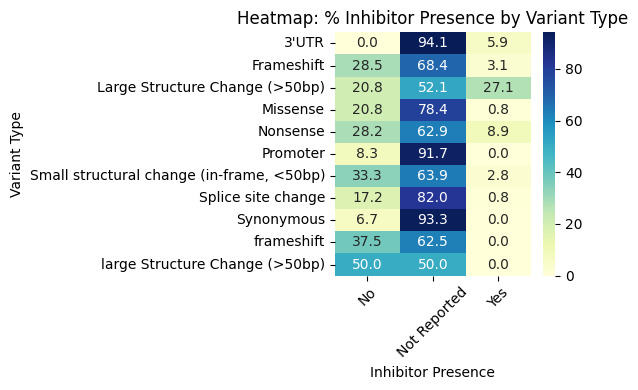

In [43]:
# Calculate percentages
variant_inhibitor_percent = pd.crosstab(
    df_chbmp["Variant Type"],
    df_chbmp["History of Inhibitor"],
    normalize='index'
) * 100

# Display
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(variant_inhibitor_percent, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Variant Type")
plt.ylabel("Variant Type")
plt.xlabel("Inhibitor Presence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nonsense” and large deletions are highly immunogenic

“Missense” often has protective or neutral behavior

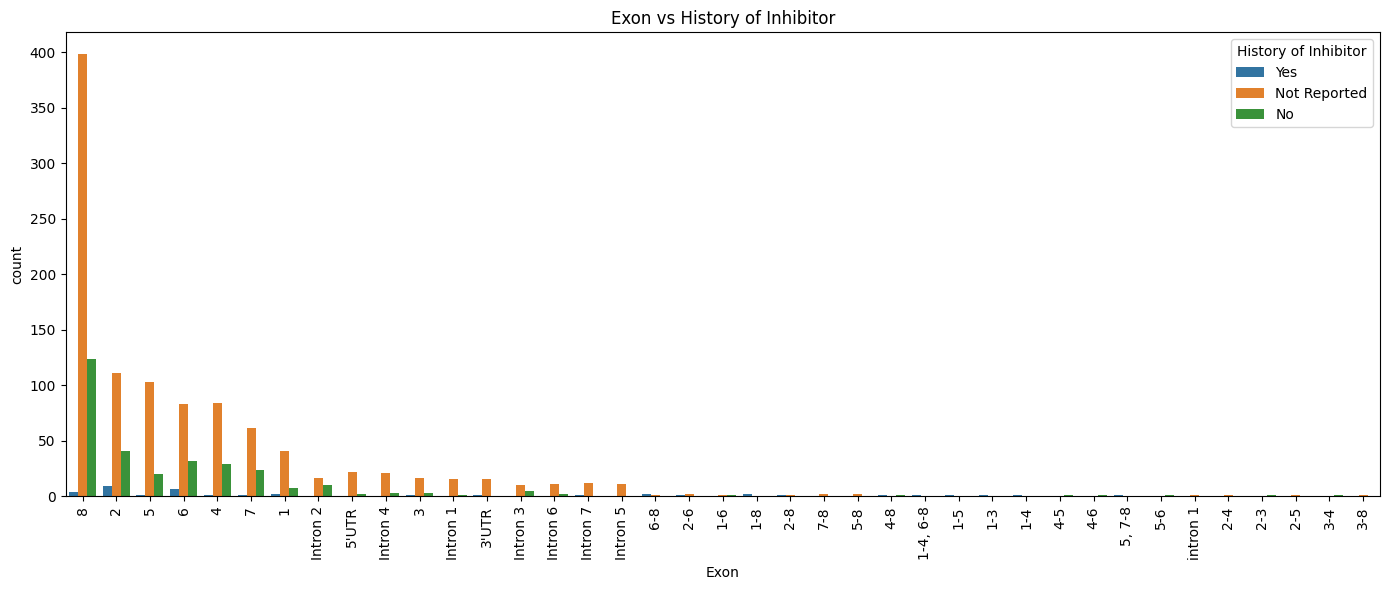

In [44]:
# Standardize 'History of Inhibitor'
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].str.strip().str.title()
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({"Np": "Not Reported"})

# Convert all 'Exon' to string for categorical plotting
df_chbmp["Exon"] = df_chbmp["Exon"].astype(str).str.strip()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.countplot(data=df_chbmp, x="Exon", hue="History of Inhibitor", order=df_chbmp["Exon"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Exon vs History of Inhibitor")
plt.tight_layout()
plt.show()


This countplot visualizes the relationship between mutation locations (Exon) and the presence or absence of inhibitors in patients.

Each bar on the x-axis represents a specific exon or region (e.g., Exon 8, Intron 1, or exon ranges like 1-4), and the bars are color-coded based on the patient's inhibitor history:

Yes (inhibitor present)

No (no inhibitor)

Not Reported (missing/uncertain info)

In [45]:
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].str.strip().str.title()
df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "Np": "Not Reported",
    "Not reported": "Not Reported",
    "No ": "No",
    "Yes ": "Yes"
})


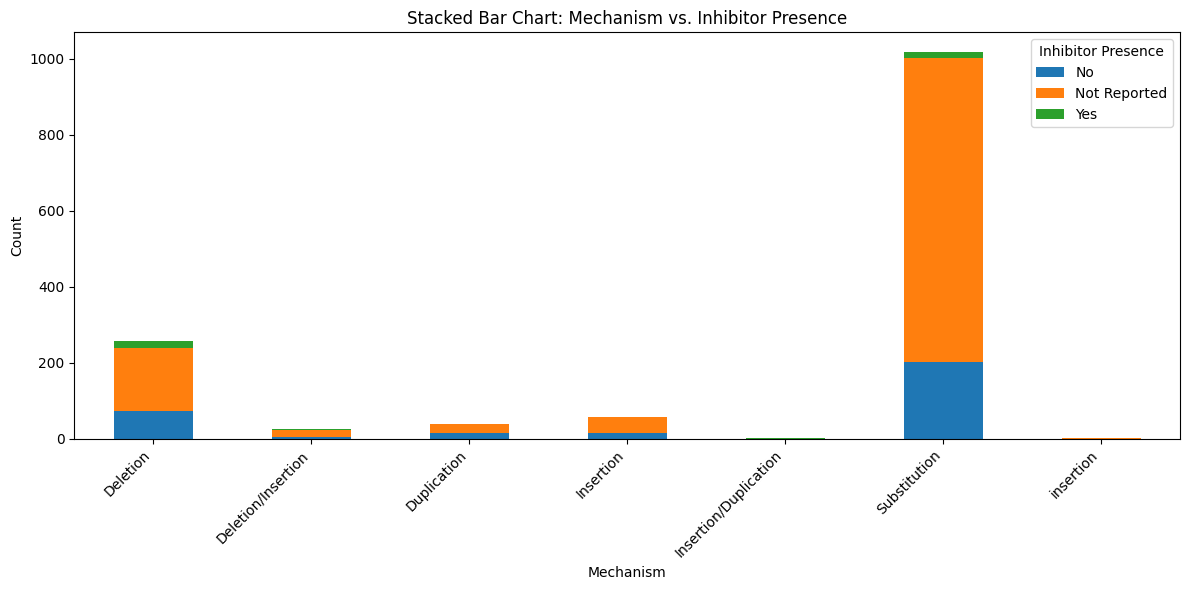

In [46]:
mechanism_counts = df_chbmp.groupby("Mechanism")["History of Inhibitor"].value_counts().unstack().fillna(0)

mechanism_counts.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Stacked Bar Chart: Mechanism vs. Inhibitor Presence")
plt.xlabel("Mechanism")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Inhibitor Presence")
plt.tight_layout()
plt.show()


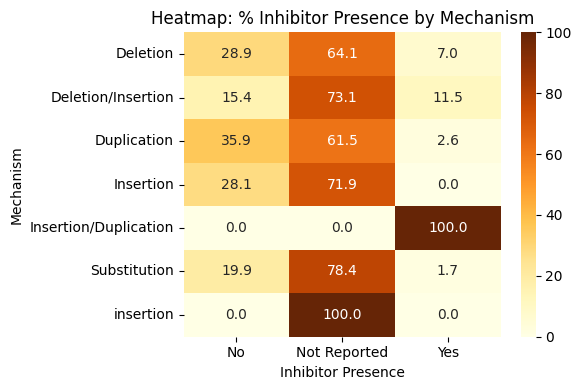

In [47]:
mechanism_percent = pd.crosstab(
    df_chbmp["Mechanism"],
    df_chbmp["History of Inhibitor"],
    normalize='index'
) * 100

plt.figure(figsize=(6, 4))
sns.heatmap(mechanism_percent, annot=True, cmap="YlOrBr", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Mechanism")
plt.xlabel("Inhibitor Presence")
plt.ylabel("Mechanism")
plt.tight_layout()
plt.show()


Key Insights: ✅ Insertion/Duplication 100% of cases show inhibitor presence!

🚨 Super rare but extremely high-risk — deserves special attention.

✅ Deletion/Insertion 11.5% Yes – highest among commonly seen mechanisms.

Suggests mixed disruptions may have immunogenic effects.

⚠️ Deletion 7.0% Yes, which is still significant.

Deletion mechanisms may result in truncated or absent proteins → immune response.

❌ Substitution, Duplication, Insertion Low percentages (≤2.6%) for inhibitor-positive cases.

Common, but typically not associated with inhibitors.

❌ "insertion" (lowercase typo?) 0% Yes, 100% Not Reported — likely a data quality issue or rare occurrence.

# Hemophilia Logistic Regression Classification

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from google.colab import files
from io import BytesIO


### Upload both CHBMP and CHAMP Excel files

Data loading from Excel

In [3]:

uploaded = files.upload()
file_names = list(uploaded.keys())
chbmp_df = pd.read_excel(BytesIO(uploaded[file_names[0]]), sheet_name=1)
champ_df = pd.read_excel(BytesIO(uploaded[file_names[1]]), sheet_name=1)


Saving CHAMP-Variant-List-2022 (3).xlsx to CHAMP-Variant-List-2022 (3).xlsx
Saving CHBMP-Variant-List-2022 (3).xlsx to CHBMP-Variant-List-2022 (3).xlsx


### Filter and prepare label column

Data cleaning

In [4]:

def clean_data(df, dataset_name):
    df = df.copy()
    df['Dataset'] = dataset_name
    df = df[df['History of Inhibitor'].isin(['Yes', 'No'])]
    df['Inhibitor_History_Binary'] = df['History of Inhibitor'].map({'Yes': 1, 'No': 0})
    return df

chbmp_df = clean_data(chbmp_df, 'CHBMP')
champ_df = clean_data(champ_df, 'CHAMP')
combined_df = pd.concat([chbmp_df, champ_df], ignore_index=True)


### Select features and label

In [6]:
# First select the features you want
features = ['Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain']
label = 'Inhibitor_History_Binary'

# Subset your data
X = combined_df[features]
y = combined_df[label]

# One-hot encode categorical columns
features_categorical = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=features_categorical)

# Convert boolean columns (True/False) to 1/0 integers
X_encoded = X_encoded.astype(int)


In [7]:

features = ['Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain']
label = 'Inhibitor_History_Binary'
X = combined_df[features]
y = combined_df[label]


### Separate numeric and categorical features

### Fill missing values

In [8]:

features_numeric = []
features_categorical = []

for col in X.columns:
    if X[col].dtype == 'object':
        features_categorical.append(col)
    else:
        features_numeric.append(col)

# Fill missing values for numeric features with the mean
X[features_numeric] = X[features_numeric].fillna(X[features_numeric].mean())
# Fill missing values for categorical features with the most frequent value (mode)
for col in features_categorical:
    # Get the most frequent value (mode)
    most_frequent_value = X[col].mode()[0]
    # Fill missing values with the mode
    X.loc[:, col] = X[col].fillna(most_frequent_value)


### One-hot encoding of categorical features, splitting and SMOTE

In [9]:

# One-hot encoding
X_encoded = pd.get_dummies(X, columns=features_categorical)

# Convert booleans (True/False) to integers (1/0)
X_encoded = X_encoded.astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)



In [10]:
# Before applying SMOTE, convert boolean columns to integers:
for column in X_train.select_dtypes(include=['bool']).columns:
    X_train[column] = X_train[column].astype(int)

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_resampled.value_counts().to_dict())


Before SMOTE: {0: 1714, 1: 401}
After SMOTE: {0: 1714, 1: 1714}


### Train logistic regression model

In [12]:

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)


### Evaluate the model

In [13]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7277882797731569

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       429
           1       0.35      0.52      0.42       100

    accuracy                           0.73       529
   macro avg       0.61      0.65      0.62       529
weighted avg       0.78      0.73      0.75       529



The model achieved an accuracy of **~72.8%**, meaning that out of all predictions, nearly 73% were correct. However, in class-imbalanced scenarios like this (more “No Inhibitor” than “Yes Inhibitor”), accuracy alone can be misleading — so we also look at other metrics.


- **Class 0 (No Inhibitor)**:
  - Precision: 0.87 → When the model predicts “No Inhibitor,” it's correct 87% of the time.
  - Recall: 0.78 → It correctly identifies 78% of actual “No Inhibitor” cases.
  
- **Class 1 (Yes Inhibitor)**:
  - Precision: 0.35 → When it predicts “Yes Inhibitor,” it’s correct 35% of the time.
  - Recall: 0.52 → It detects 52% of all true inhibitor cases.


### Confusion Matrix

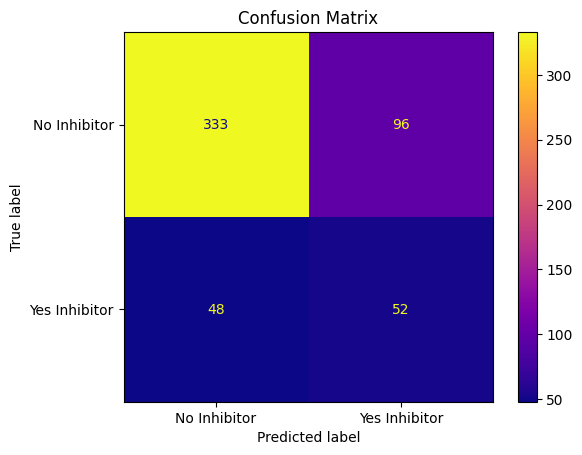

In [15]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Inhibitor', 'Yes Inhibitor'])
disp.plot(cmap='plasma')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()


#ROC and PR curves

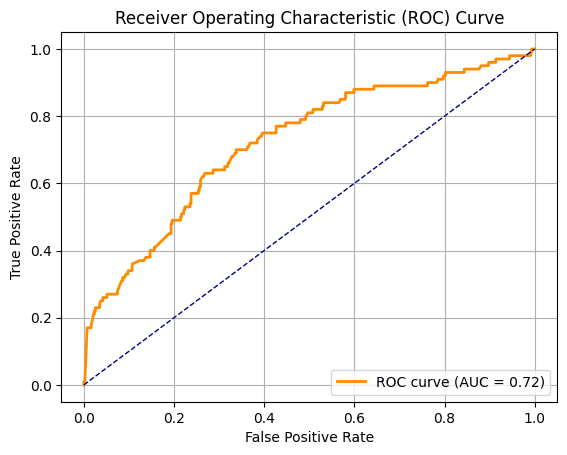

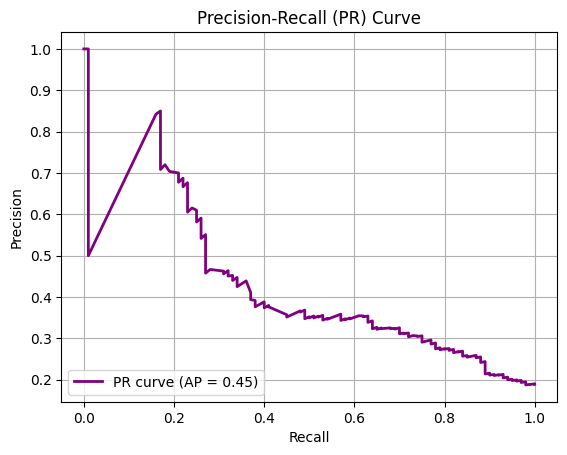

In [16]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities for ROC/PR curves
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, color='purple', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


###  ROC Curve (AUC = 0.72)
The ROC (Receiver Operating Characteristic) curve shows how well the model distinguishes between classes.  
- **AUC = 0.72** means there’s a 72% chance the model ranks a random positive (inhibitor) case higher than a negative one.  
- This indicates **fair** discrimination ability — better than random, but there is room to improve.


###  Precision-Recall (PR) Curve
The PR curve is especially useful for **imbalanced datasets** like this one.
- It shows how precision and recall trade off.
- In our case, the model finds **over half** of the inhibitor cases (52% recall), though precision is lower.
- The curve confirms that **the model is learning useful signals about the rare inhibitor class**.


In [18]:
# Get feature names and coefficients from your trained logistic regression model
feature_names = X_encoded.columns
coefficients = clf.coef_[0]  # use the correct model variable, here it's 'clf'

# Create DataFrame of feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance (abs)': abs(coefficients)
})

# Sort by importance and display top 15
feature_importance_df = feature_importance_df.sort_values(by='Importance (abs)', ascending=False)
feature_importance_df.head(15)


,Feature,Coefficient,Importance (abs)
51,Exon_26,-3.073569,3.073569
29,Exon_4,-2.902599,2.902599
37,Exon_12,-2.722577,2.722577
40,Exon_15,-2.691332,2.691332
168,Exon_7,-2.556208,2.556208
178,Exon_8,-2.524339,2.524339
32,Exon_7,-2.394723,2.394723
33,Exon_8,-2.351929,2.351929
183,Exon_Intron 1,-2.336093,2.336093
5,Variant Type_Missense,-2.309585,2.309585


Exon-related features (like Exon_26, Exon_4, etc.) dominate the top ranks — suggesting certain exon locations are highly predictive.

Mechanism_Duplication and Variant Type_Missense also show up, indicating their strong role in inhibitor risk.

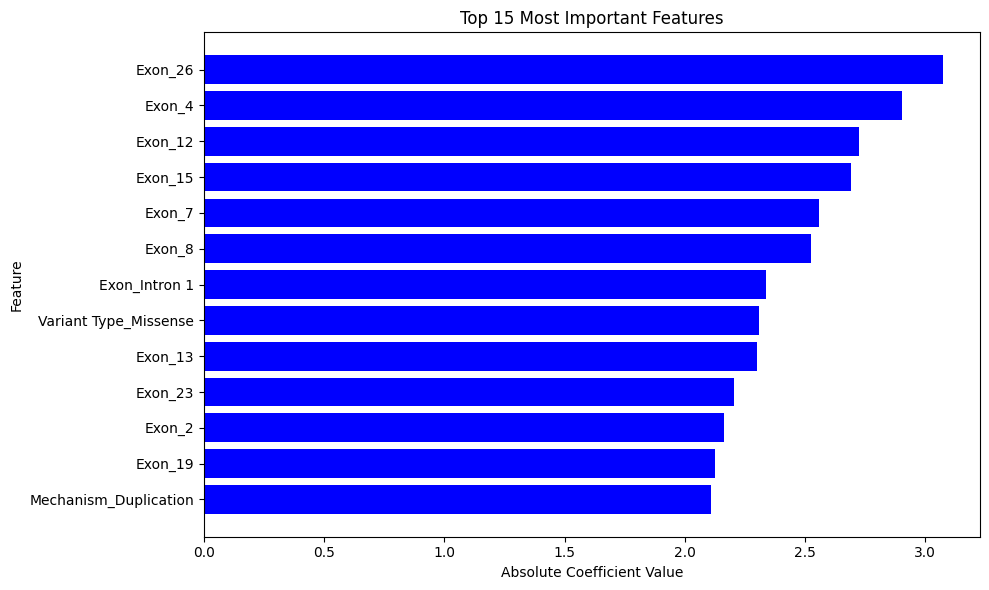

In [22]:
import matplotlib.pyplot as plt

# Sort by absolute importance (already done if using feature_importance_df from before)
top_features = feature_importance_df.sort_values(by='Importance (abs)', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance (abs)'], color='blue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
